# テーマ：膝関節痛、喫煙歴等の臨床情報から骨粗鬆症診断を行うAI

# インドの病院にて定量的超音波検査を受けた243症例

# データを確認

In [ ]:
import pandas as pd

df = pd.read_excel("/content/patient details.xlsx")

display(df)

,S.No,Patient Id,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Alcoholic,...,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,Z-Score Value,BMI:,Site,Obesity,Diagnosis
0,1.0,OP1,yes,male,65.000000,NaN,1.645920,65.000000,yes,no,...,no,0.2,normal,normal,-1.98,0.73,23.993627,knee,normal weight,osteopenia
1,2.0,OP2,yes,female,54.000000,46,1.676400,78.000000,no,no,...,no,1.0,normal,"G.B rem, B.P",-2.26,-2.71,27.754876,knee,over weight,osteopenia
2,3.0,OP3,yes,female,49.000000,43,1.371600,59.000000,no,no,...,no,1.0,low protiens,no,-1.92,-1.51,31.361517,knee,obesity,osteopenia
3,4.0,OP4,yes,female,57.000000,40,1.524000,72.000000,no,no,...,no,2.0,low fats,uterus removed,-2.23,-1.13,31.000062,knee,obesity,osteopenia
4,5.0,OP5,yes,female,40.000000,NaN,1.493520,54.000000,no,no,...,no,2.0,normal,depression,-1.81,-1.05,24.208711,knee,normal weight,osteopenia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,239.0,OP154,yes,female,56.000000,48,1.520000,68.000000,no,no,...,yes,0.2,"low fats,proteins","G.B& uterus rem, intestine surgery",-2.01,-1.13,29.432133,knee,overweight,osteopenia
239,240.0,N37,yes,male,39.000000,NaN,1.630000,70.000000,no,no,...,no,5.0,low salt,no,-0.76,-0.59,26.346494,knee,over weight,normal
240,NaN,NaN,NaN,NaN,107.000000,max,1.828800,98.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,NaN,NaN,NaN,NaN,17.000000,min,1.371600,39.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 一部の項目に絞る

In [ ]:
cols = ["Patient Id", "Joint Pain:", "Gender", "Age", "BMI: ", "Smoker", "Alcoholic", "Family History of Osteoporosis", "Maximum Walking distance (km)",
        "Diagnosis"]
df = df[cols]
df

,Patient Id,Joint Pain:,Gender,Age,BMI:,Smoker,Alcoholic,Family History of Osteoporosis,Maximum Walking distance (km),Diagnosis
0,OP1,yes,male,65.000000,23.993627,yes,no,no,0.2,osteopenia
1,OP2,yes,female,54.000000,27.754876,no,no,no,1.0,osteopenia
2,OP3,yes,female,49.000000,31.361517,no,no,no,1.0,osteopenia
3,OP4,yes,female,57.000000,31.000062,no,no,no,2.0,osteopenia
4,OP5,yes,female,40.000000,24.208711,no,no,no,2.0,osteopenia
...,...,...,...,...,...,...,...,...,...,...
238,OP154,yes,female,56.000000,29.432133,no,no,yes,0.2,osteopenia
239,N37,yes,male,39.000000,26.346494,no,no,no,5.0,normal
240,NaN,NaN,NaN,107.000000,NaN,NaN,NaN,NaN,NaN,NaN
241,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,NaN


# 欠損値を含む症例を除く

In [ ]:
df = df.dropna(how='any').reset_index(drop=True)
df

,Patient Id,Joint Pain:,Gender,Age,BMI:,Smoker,Alcoholic,Family History of Osteoporosis,Maximum Walking distance (km),Diagnosis
0,OP1,yes,male,65.0,23.993627,yes,no,no,0.2,osteopenia
1,OP2,yes,female,54.0,27.754876,no,no,no,1.0,osteopenia
2,OP3,yes,female,49.0,31.361517,no,no,no,1.0,osteopenia
3,OP4,yes,female,57.0,31.000062,no,no,no,2.0,osteopenia
4,OP5,yes,female,40.0,24.208711,no,no,no,2.0,osteopenia
...,...,...,...,...,...,...,...,...,...,...
234,OP152,yes,female,56.0,33.732501,no,no,yes,0.2,osteopenia
235,OS49,yes,male,55.0,26.912726,no,no,no,6.0,osteoporosis
236,OP153,yes,male,49.0,31.553659,no,no,yes,0.5,osteopenia
237,OP154,yes,female,56.0,29.432133,no,no,yes,0.2,osteopenia


# データを可視化

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'BMI: '}>],
       [<Axes: title={'center': 'Maximum Walking distance (km)'}>,
        <Axes: >]], dtype=object)

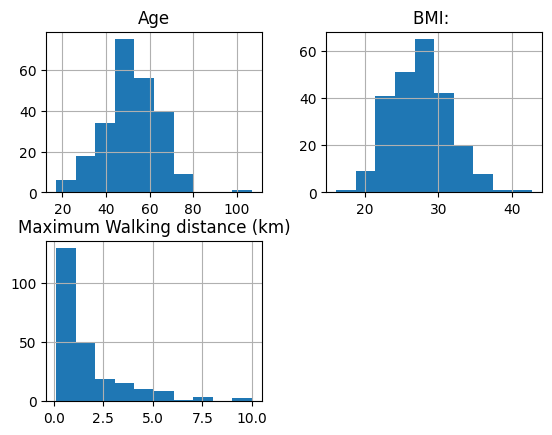

In [ ]:
df.hist()

<Axes: xlabel='Diagnosis'>

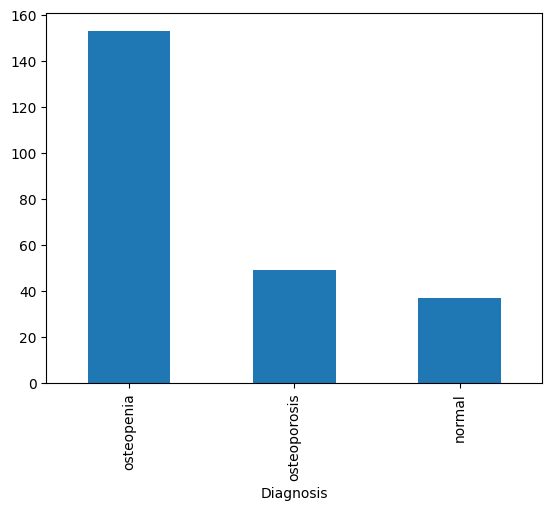

In [ ]:
df["Diagnosis"].value_counts().plot(kind="bar")

# データの正規化

In [ ]:
yesorno = {"yes":0, "no":1}
gender = {"male": 0, "female": 1}
diagnosis = {"normal": 0, "osteopenia": 1, "osteoporosis": 2}
df["Joint Pain:"] = df["Joint Pain:"].map(yesorno)
df["Gender"] = df["Gender"].map(gender)
df["Smoker"] = df["Smoker"].map(yesorno)
df["Alcoholic"] = df["Alcoholic"].map(yesorno)
df["Family History of Osteoporosis"] = df["Family History of Osteoporosis"].map(yesorno)
df["Diagnosis"] = df["Diagnosis"].map(diagnosis)
df

,Patient Id,Joint Pain:,Gender,Age,BMI:,Smoker,Alcoholic,Family History of Osteoporosis,Maximum Walking distance (km),Diagnosis
0,OP1,0,0,65.0,23.993627,0,1,1,0.2,1
1,OP2,0,1,54.0,27.754876,1,1,1,1.0,1
2,OP3,0,1,49.0,31.361517,1,1,1,1.0,1
3,OP4,0,1,57.0,31.000062,1,1,1,2.0,1
4,OP5,0,1,40.0,24.208711,1,1,1,2.0,1
...,...,...,...,...,...,...,...,...,...,...
234,OP152,0,1,56.0,33.732501,1,1,0,0.2,1
235,OS49,0,0,55.0,26.912726,1,1,1,6.0,2
236,OP153,0,0,49.0,31.553659,1,1,0,0.5,1
237,OP154,0,1,56.0,29.432133,1,1,0,0.2,1


# 訓練データ、検証データ、テストデータに分割 (60: 20: 20)
・AIモデルの学習は訓練データで行われる。

・AIは、学習を繰り返すことで少しずつ賢くなる。

・しかし、学習しすぎると逆に精度が下がってしまう。

・よって、検証データを用いて、最適な学習回数で止める。

・最終的なAIモデルの精度は、テストデータを持ちて行われる。

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test_valid = train_test_split(df, test_size=0.4)
df_test, df_valid = train_test_split(df_test_valid, test_size=0.5, random_state=1)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)

# AIモデルを選択
・今回のデータ形式は表データである。

・よって、表データを扱うAIモデルの中から選択

・AIモデルとして、LightGBMを採用

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()

# AIモデルの学習

In [ ]:
x_train = df_train.iloc[:, 1:-1]
t_train = df_train.iloc[:, -1]
x_val = df_valid.iloc[:, 1:-1]
t_val = df_valid.iloc[:, -1]

model.fit(x_train, t_train, eval_set=[(x_train, t_train), (x_val, t_val)])

LightGBMError: Do not support special JSON characters in feature name.

In [ ]:
import re

# Clean column names in both training and validation data
x_train = x_train.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))
x_val = x_val.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))

model.fit(x_train, t_train, eval_set=[(x_train, t_train), (x_val, t_val)])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 143, number of used features: 6
[LightGBM] [Info] Start training from score -1.827350
[LightGBM] [Info] Start training from score -0.463035
[LightGBM] [Info] Start training from score -1.561647
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

LGBMClassifier()

# テストデータで精度検証

In [ ]:
x_test = df_test.iloc[:, 1:-1]
t_test = df_test.iloc[:, -1]

# Replace colons and spaces in column names with underscores
x_test.columns = x_test.columns.str.replace('[: ]', '_', regex=True)

y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

print(classification_report(t_test.values, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.56      0.71         9
           1       0.68      0.78      0.72        27
           2       0.50      0.50      0.50        12

    accuracy                           0.67        48
   macro avg       0.73      0.61      0.65        48
weighted avg       0.69      0.67      0.67        48



# どの情報が結果に影響を与えているか
・Feature Importance：学習時にどの情報が大事か可視化

・SHAP：テストデータ上で、どの情報が大事か可視化

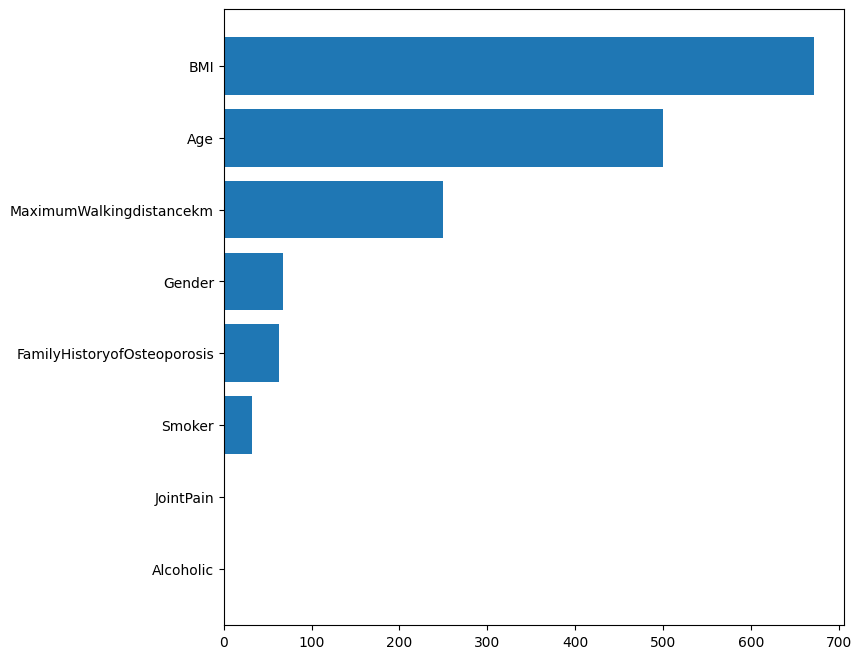

In [ ]:
import matplotlib.pyplot as plt

# feature importanceを表示
plt.figure(figsize=(8, 8))

model_importance = 0
model_importance += model.feature_importances_
#importance = pd.DataFrame(model.feature_importances_, index=vectorizer.get_feature_names(), columns=['importance'])
importance = pd.DataFrame(model_importance, index=x_train.columns, columns=['importance'])
importance = importance.sort_values('importance', ascending=False)
#display(importance[:20])
tmp = importance[:10]
plt.barh(tmp.index.values[::-1], tmp["importance"].values[::-1])
plt.savefig('table_unimodal_feature_importance.png')

Class 0 SHAP values


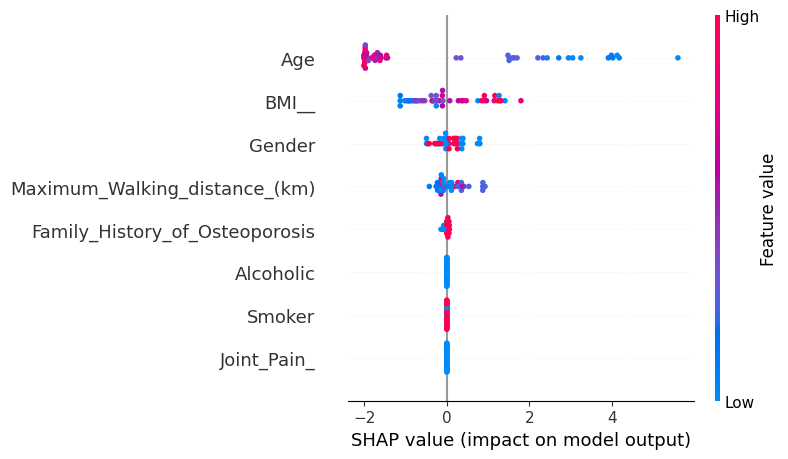

Class 1 SHAP values


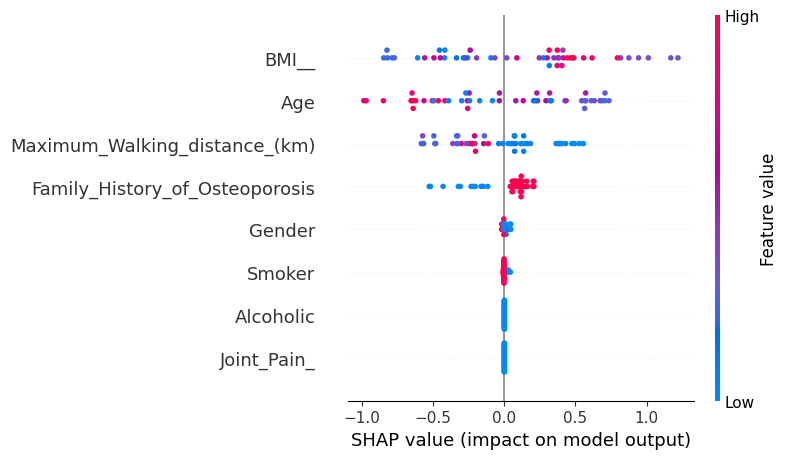

Class 2 SHAP values


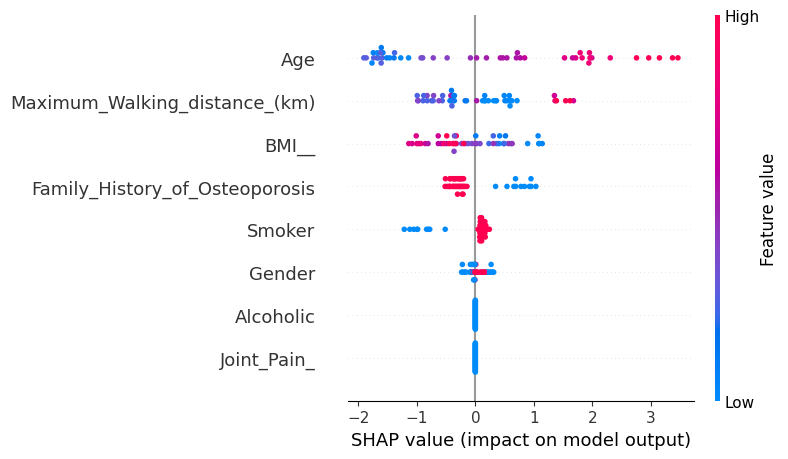

In [ ]:
!pip install -q shap

import shap
#notebook内でJavascriptを動かすためのおまじない
shap.initjs()
explainer = shap.TreeExplainer(model=model)
shap_values = explainer.shap_values(X=x_test)

import warnings
warnings.simplefilter('ignore')

# 各クラスのSHAP値のプロット
for i in range(shap_values.shape[-1]):
    print(f"Class {i} SHAP values")
    shap.summary_plot(shap_values[:, :, i], x_test)#, plot_type='bar')